In [1]:
import numpy as np

def criaDatasetBidimensionalBinário(n=20):
    """
    Cria um dataset bidimensional binário com
    rótulos igual 1 para todo exemplo que tiver
    o valor da primeira característica maior do
    que a da segunda, e -1 para os demais.
    """
    X = np.random.uniform(size=(n,2))
    y = np.array(X[:,0]>X[:,1], dtype=int)*2-1
    return X, y

Xtr, ytr = criaDatasetBidimensionalBinário()
Xtr, ytr

(array([[0.08765634, 0.45227926],
        [0.14387277, 0.41745882],
        [0.51121845, 0.78952415],
        [0.8434055 , 0.05578661],
        [0.95322397, 0.70429067],
        [0.14865801, 0.4948138 ],
        [0.2176412 , 0.89234215],
        [0.65368843, 0.58691574],
        [0.76011246, 0.29817287],
        [0.94398715, 0.0456259 ],
        [0.03303797, 0.11339653],
        [0.62704884, 0.94416275],
        [0.83042612, 0.71344072],
        [0.51734446, 0.71278872],
        [0.89091596, 0.29399865],
        [0.82315982, 0.96463349],
        [0.61831476, 0.30523362],
        [0.15972786, 0.10473089],
        [0.30596432, 0.91327162],
        [0.2037673 , 0.12611192]]),
 array([-1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1,
         1, -1,  1]))

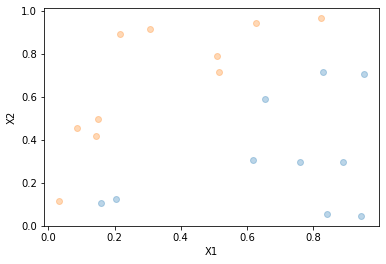

In [2]:
import matplotlib.pyplot as plt

def plotaDatasetBidimensional(X, y):
    """
    Plota um dataset bidimensional.
    """
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotaDatasetBidimensional(Xtr, ytr)

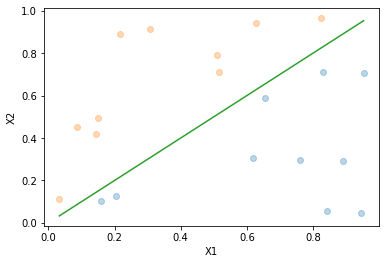

In [3]:
def plotaHiperplanoDatasetBidimensional(X, y, vetor, intercept=0):
    """
    Plota um dataset bidimensional com um hiperplano definido por um
    vetor e o valor em que este vetor intercepta o eixo vertical.
    """
    x0min = min(X[:,0])
    x0max = max(X[:,0])
    xs = np.linspace(x0min, x0max, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
    plotaDatasetBidimensional(X, y)
    plt.plot(xs,ys)

plotaHiperplanoDatasetBidimensional(Xtr, ytr, [1,-1])

In [4]:
def sign(a):
    return (a >= 0) * 2 - 1


In [5]:
def accuracy(yactual, ypred):
    return sum(yactual == ypred)/len(yactual)

1.0
[ 7.35596161 -6.97120962]


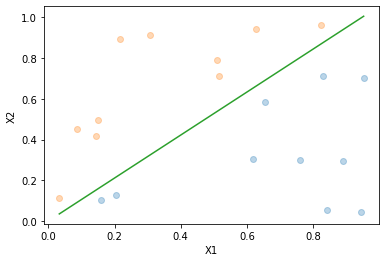

In [6]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
    """
    Versão do Perceptron com limite de iterações,
    treinado em batch.
    """
    def __init__(self, max_iter=100):
        self.w = None
        self.activation = sign
        self.max_iter = max_iter

    def fit(self, X, y):
        self.w = np.random.uniform(-1, 1, size=X.shape[1])
        for _ in range(self.max_iter):
            ypred = self.predict(X)
            erros = y - ypred
            custo = sum(erros**2)
            if custo == 0:
                break
            self.w += X.T @ erros

    def predict(self, X):
        a = X @ self.w
        ypred = self.activation(a)
        return ypred

perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w)

In [7]:
Xte, yte = criaDatasetBidimensionalBinário(1000)

0.972


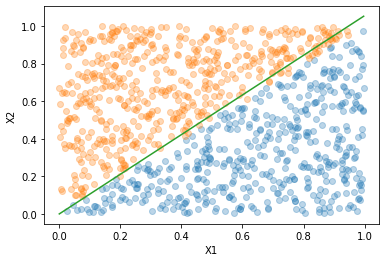

In [8]:
print(accuracy(yte, perceptron.predict(Xte)))
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w)